
# ***PYTHON PROJECT CODE***


In [1]:
# Mount Google Drive for data access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTING THE LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

**LOADING AND PREPROCESSING THE DATA**

In [3]:
# Load training data
dataset_train = pd.read_csv("/content/drive/MyDrive/S.I.R.I.U.S./trainset.csv")
trainset = dataset_train.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range=(0, 1))
training_scaled = sc.fit_transform(trainset)

In [4]:
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [5]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [6]:
# Load test data
dataset_test = pd.read_csv("/content/drive/MyDrive/S.I.R.I.U.S./testset.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [7]:
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600
...,...,...,...,...,...,...,...
120,2018-06-25,1143.599976,1143.910034,1112.780029,1124.810059,1124.810059,2157300
121,2018-06-26,1128.000000,1133.209961,1116.659058,1118.459961,1118.459961,1563200
122,2018-06-27,1121.339966,1131.836060,1103.619995,1103.979980,1103.979980,1293900
123,2018-06-28,1102.089966,1122.310059,1096.010010,1114.219971,1114.219971,1072400


In [8]:
#Preprocessing the data
x_train, y_train = [], []
for i in range(60, 1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

**LSTM MODEL**

In [15]:
# Building the LSTM model
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))


In [16]:
for _ in range(3):  # Add three more LSTM layers with Dropout
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))  # Final LSTM layer
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))  # Output layer
regressor.compile(optimizer='adam', loss='mean_squared_error')


In [26]:
# Training the model
history = regressor.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.1)

Epoch 1/100
34/34 [==============================] - 6s 167ms/step - loss: 0.0015 - val_loss: 8.6930e-04
Epoch 2/100
34/34 [==============================] - 8s 240ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 3/100
34/34 [==============================] - 5s 142ms/step - loss: 0.0016 - val_loss: 8.3929e-04
Epoch 4/100
34/34 [==============================] - 6s 192ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 5/100
34/34 [==============================] - 5s 141ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 6/100
34/34 [==============================] - 5s 148ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 7/100
34/34 [==============================] - 6s 182ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 8/100
34/34 [==============================] - 5s 141ms/step - loss: 0.0013 - val_loss: 0.0046
Epoch 9/100
34/34 [==============================] - 6s 182ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 10/100
34/34 [==============================] - 5s 153ms/step - loss: 0.0013 

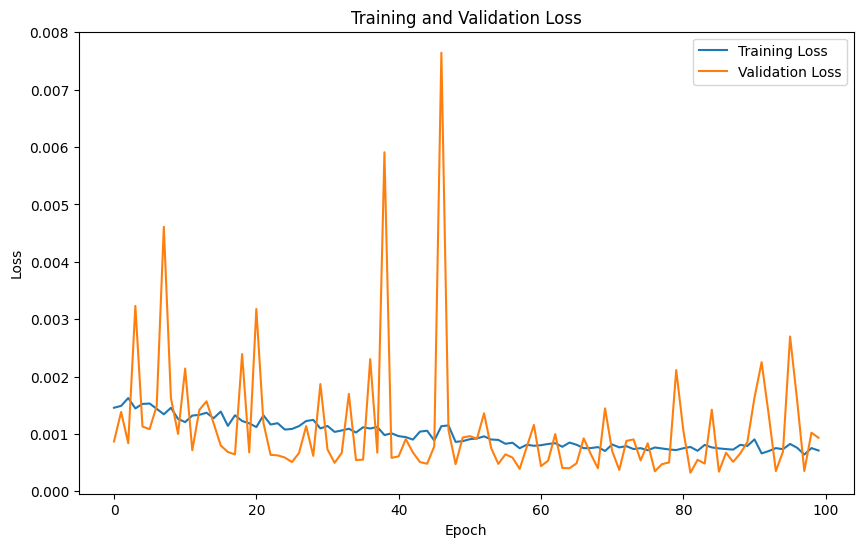

In [27]:
# Visualize training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**MAKING PREDICTIONS**

In [28]:
# Prepare input data for prediction
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

x_test = []
for i in range(60, 185):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
# Predict stock prices
predicted_price = regressor.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

4/4 [==============================] - 0s 66ms/step


**VISUALIZING THE RESULTS**

In [30]:
# Display the last few real and predicted prices
print("Last 10 Real Stock Prices:\n", real_stock_price[-10:])
print("\nLast 10 Predicted Stock Prices:\n", predicted_price[-10:])

Last 10 Real Stock Prices:
 [[1143.650024]
 [1158.5     ]
 [1175.310059]
 [1174.849976]
 [1159.140015]
 [1143.599976]
 [1128.      ]
 [1121.339966]
 [1102.089966]
 [1120.      ]]

Last 10 Predicted Stock Prices:
 [[1103.5631]
 [1104.0977]
 [1109.2573]
 [1118.0726]
 [1122.8026]
 [1120.0471]
 [1113.4592]
 [1105.2158]
 [1099.023 ]
 [1089.9354]]


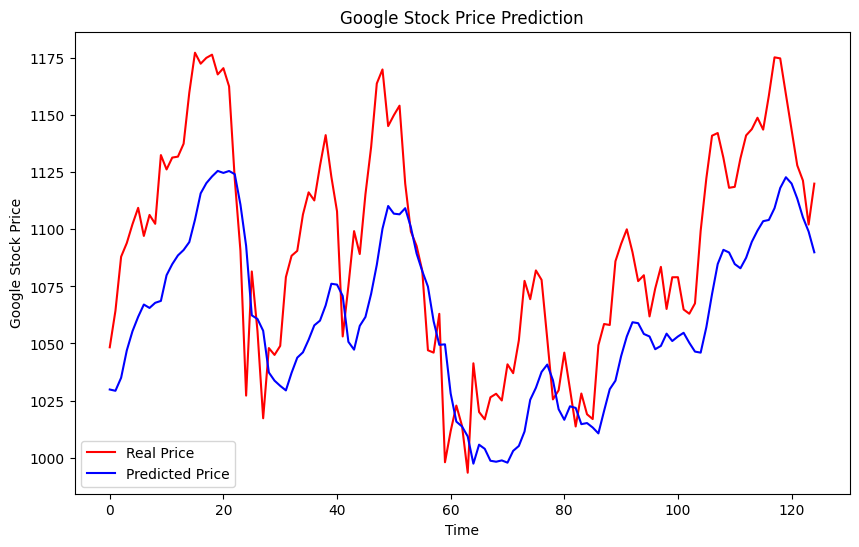

In [31]:
# Visualize predicted vs. real stock prices
plt.figure(figsize=(10, 6))
plt.plot(real_stock_price, color='red', label='Real Price')
plt.plot(predicted_price, color='blue', label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

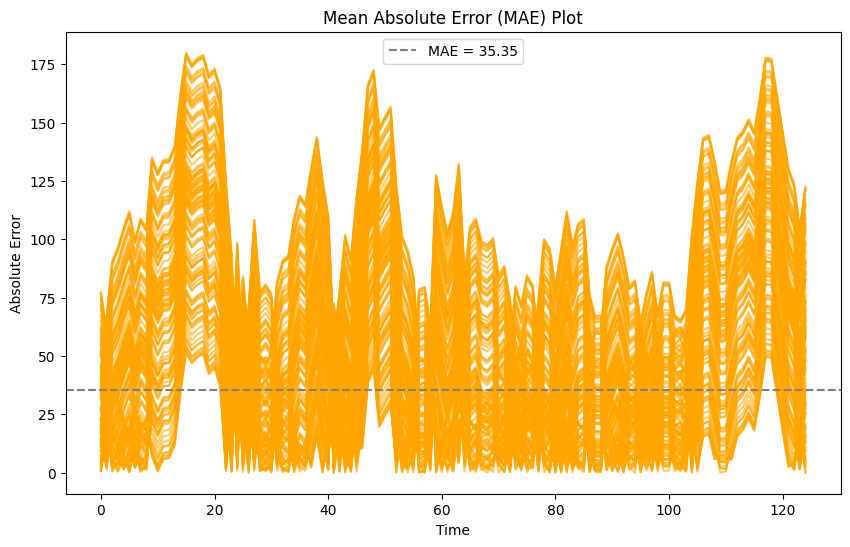

In [32]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(real_stock_price, predicted_price)

# Create a MAE plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(predicted_price)), np.abs(real_stock_price - predicted_price.flatten()), color='orange', alpha=0.6)
plt.axhline(y=mae, color='gray', linestyle='--', label=f'MAE = {mae:.2f}')
plt.title('Mean Absolute Error (MAE) Plot')
plt.xlabel('Time')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()


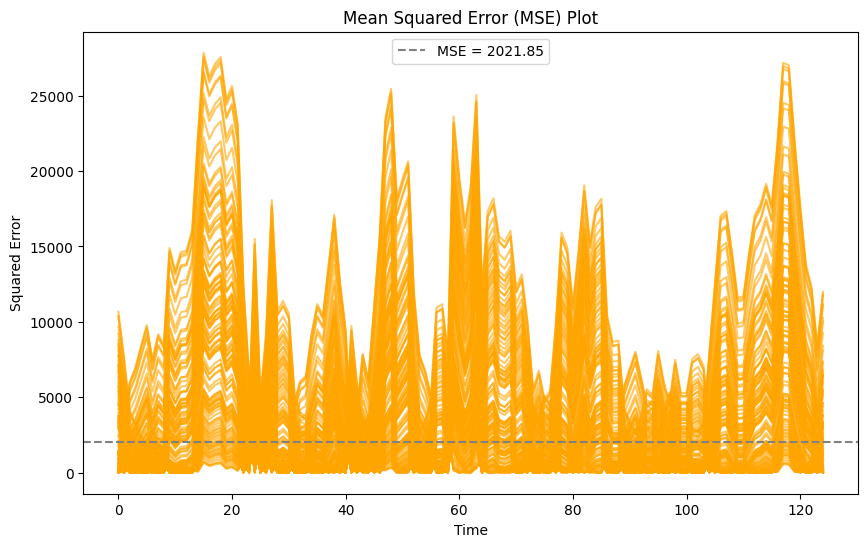

In [24]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(real_stock_price, predicted_price)

# Create a MSE plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(predicted_price)), (real_stock_price - predicted_price.flatten())**2, color='orange', alpha=0.6)
plt.axhline(y=mse, color='gray', linestyle='--', label=f'MSE = {mse:.2f}')
plt.title('Mean Squared Error (MSE) Plot')
plt.xlabel('Time')
plt.ylabel('Squared Error')
plt.legend()
plt.show()
